# Detecting Credit Card Fraud: Logistic Regression

### Jake Fox
### 8/1/2023

In [1]:
# Importing packages and getting an overview of the data

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"D:\creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Time:

- Number of seconds elapsed between this transaction and the first transaction in the database (Time = 0.0 are the first transactions recorded)

In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Checking for irregularities

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
clean = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# Heavy Class Imbalance:

In [9]:
print(clean.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
clean.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [11]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [12]:
clean.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [13]:
fraud.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


In [14]:
fraud['Amount'].sort_values(ascending=False)

176049    2125.87
6971      1809.68
249167    1504.93
89190     1402.16
81609     1389.56
           ...   
143334       0.00
69980        0.00
248296       0.00
93788        0.00
541          0.00
Name: Amount, Length: 492, dtype: float64

-----------------------------------------------------------------------------------------------------------------

# Model 1

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [16]:
y = df['Class']
X = df.drop(['Class'], axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

coef = logreg.coef_[0]
coef_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': coef})
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False).reset_index(drop=True)
coef_df

,Variable,Coefficient,Absolute Coefficient
0,V4,0.929694,0.929694
1,V10,-0.737560,0.737560
2,V14,-0.608130,0.608130
3,V22,0.526659,0.526659
4,V27,-0.354227,0.354227
5,V20,-0.353818,0.353818
6,Time,-0.341076,0.341076
7,V9,-0.316397,0.316397
8,V21,0.291972,0.291972
9,V13,-0.269208,0.269208


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [20]:
y_pred_test = logreg.predict(X_test)

In [21]:
matrix = confusion_matrix(y_test, y_pred_test)
matrix

array([[56855,     9],
       [   41,    57]], dtype=int64)

- 41 out of 98 fraudulent payments went undetected with this model.

In [22]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9991222218320986
Precision: 0.8636363636363636
Recall: 0.5816326530612245
F1-score: 0.6951219512195121


In [23]:
y_pred_train = logreg.predict(X_train)

In [24]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print('Training - Test Sets')
print()
print("Accuracy:", accuracy_train - accuracy)
print("Precision:", precision_train - precision)
print("Recall:", recall_train - recall)
print("F1-score:", f1_train - f1)

Training - Test Sets

Accuracy: 0.00010971215811395041
Precision: 0.03167049556941248
Recall: 0.047808971304257764
F1-score: 0.04407327977899744


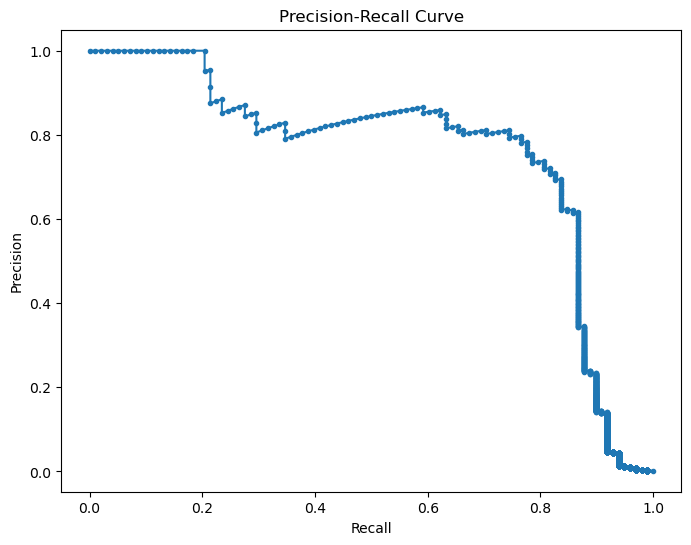

AUPRC: 0.7570734366870203


In [25]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_probs = logreg.predict_proba(X_test)[:, 1]  # Predict probabilities for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)
auprc = average_precision_score(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

print("AUPRC:", auprc)

### Not only does this model have clear overfit because the training set outperforms the testing set, but it also is very poor at predicting fraudulent payments.

- I can attribute the overfit to using too many predictors causing some possible multicollinearity.
- I can attribute the poor fraudulent predictions to class imbalance because I know there are many more instances of non-fraudulent transactions than there are fraudulent.

-----------------------------------------------------------------------------------------------------------------

## Let's level out the classes:

In [26]:
from imblearn.over_sampling import SMOTE

y = df['Class']
X = df.drop('Class', axis=1)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [27]:
df_resampled = pd.DataFrame(X_smote, columns=X.columns)
df_resampled['Class'] = y_smote

In [28]:
df_resampled['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [29]:
df_resampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,144838.659385,-6.379157,1.672637,-5.885670,2.068340,-0.668576,-3.336450,-4.995823,2.632847,-2.275158,...,0.641337,-0.249308,-2.311290,-0.159402,1.190079,-0.258067,0.777265,-0.728919,7.334751,1
568626,65965.011763,-2.479028,0.958932,-1.782249,1.541783,-1.191990,-0.466794,-1.957161,0.312580,-0.433956,...,0.351983,0.208869,-0.235986,-0.404446,0.220454,0.685263,-0.890346,0.598736,74.507571,1
568627,34592.129093,-1.799894,2.368957,-2.673997,1.705968,-1.355923,-1.121788,-2.057832,-1.677459,-0.659287,...,1.473371,-0.581778,-0.013899,-0.144597,0.120315,0.242272,-0.121166,-0.534238,102.486823,1
568628,129683.002907,0.255234,2.432041,-5.388252,3.793925,-0.230814,-1.382725,-1.572929,0.748305,-1.600633,...,0.316760,-0.036858,0.182968,0.190701,-0.339250,-0.272824,0.315507,-0.091005,58.346854,1


-----------------------------------------------------------------------------------------------------------------

## Model 2: Resampled

In [30]:
y = df_resampled['Class']
X = df_resampled.drop(['Class'], axis=1)

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

coef = logreg.coef_[0]
coef_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': coef})
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False).reset_index(drop=True)
coef_df

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Variable,Coefficient,Absolute Coefficient
0,V17,-10.405067,10.405067
1,V14,-9.706597,9.706597
2,V12,-7.785781,7.785781
3,V1,6.820825,6.820825
4,V7,-6.228318,6.228318
5,V10,-5.253468,5.253468
6,V5,4.954916,4.954916
7,V3,3.852531,3.852531
8,V16,-3.331362,3.331362
9,V2,3.303904,3.303904


In [33]:
y_pred_test = logreg.predict(X_test)

In [34]:
matrix = confusion_matrix(y_test, y_pred_test)
matrix

array([[56245,   505],
       [ 1698, 55278]], dtype=int64)

## After oversampling, we can see the model works a lot better in predicting fraudulent transactions.

**only about 2.98% of fraudulent transactions went undetected**

OR

**about 97.02% of fraudulent transactions were detected**

## We also still have high accuracy for predicting clean transactions.

**about 99.11% of all clean transactions were classified correctly**

OR

**only about 0.89% of clean transactions were falsely flagged as fraudulent**


In [35]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9806288799395038
Precision: 0.990947062725203
Recall: 0.9701979780960405
F1-score: 0.9804627568531116


In [36]:
y_pred_train = logreg.predict(X_train)

In [37]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print('Training - Test Sets')
print()
print("Accuracy:", accuracy_train - accuracy)
print("Precision:", precision_train - precision)
print("Recall:", recall_train - recall)
print("F1-score:", f1_train - f1)

Training - Test Sets

Accuracy: -0.00043965320155470167
Precision: 0.00024718136117163336
Recall: -0.0012309288875896884
F1-score: -0.0005081325370833722


### We can see here that the overfit is almost completely eliminated as well, with only the precision having the slightest bit.

- Biggest issue now: **Simplicity.** We aren't going to input 30 different features every time we want to use the model. It must be simpler without losing too much accuracy/confidence.

### Let's use the correlations from the resampled data to pick the highest coefficients for predicting Class:

In [38]:
top_5_features = coef_df.head()['Variable'].tolist()

In [39]:
df_top_5 = df_resampled[top_5_features + ['Class']]

In [40]:
df_top_5

,V17,V14,V12,V1,V7,Class
0,0.207971,-0.311169,-0.617801,-1.359807,0.239599,0
1,-0.114805,-0.143772,1.065235,1.191857,-0.078803,0
2,1.109969,-0.165946,0.066084,-1.358354,0.791461,0
3,-0.684093,-0.287924,0.178228,-0.966272,0.237609,0
4,-0.237033,-1.119670,0.538196,-1.158233,0.592941,0
...,...,...,...,...,...,...
568625,-5.049598,-7.117708,-4.486300,-6.379157,-4.995823,1
568626,-5.271550,-5.814432,-3.547189,-2.479028,-1.957161,1
568627,-7.976272,-8.583333,-6.151653,-1.799894,-2.057832,1
568628,-1.317183,-6.799122,-3.858143,0.255234,-1.572929,1


-----------------------------------------------------------------------------------------------------------------

# Model 3: No Overfit

In [41]:
y = df_top_5['Class']
X = df_top_5.drop('Class', axis=1)

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred_test = logreg.predict(X_test)

In [45]:
matrix = confusion_matrix(y_test, y_pred_test)
matrix

array([[55907,   843],
       [ 3460, 53516]], dtype=int64)

In [46]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.96216344547421
Precision: 0.9844919884471752
Recall: 0.9392726762145465
F1-score: 0.9613508779808685


In [47]:
y_pred_train = logreg.predict(X_train)

In [48]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print('Training - Test Sets')
print()
print("Accuracy:", accuracy_train - accuracy)
print("Precision:", precision_train - precision)
print("Recall:", recall_train - recall)
print("F1-score:", f1_train - f1)

Training - Test Sets

Accuracy: -0.0015321914074178933
Precision: -0.0005561712350226067
Recall: -0.00275936349653505
F1-score: -0.001711825513214249


### Much better. Here, we only used 5 predictors, yet we maintain similarly high accuracy. This time, though, there is absolutely 0 overfit, as all test scores are better than the train scores.

- The last thing to do here is find the optimal amount of predictors so that overfit is still eliminated, but the overall accuracy of the model is still high while keeping the model simple.

-----------------------------------------------------------------------------------------------------------------

## Model 4

In [49]:
top_7_features = coef_df.head(7)['Variable'].tolist()

In [50]:
df_top_7 = df_resampled[top_7_features + ['Class']]

In [51]:
df_top_7

,V17,V14,V12,V1,V7,V10,V5,Class
0,0.207971,-0.311169,-0.617801,-1.359807,0.239599,0.090794,-0.338321,0
1,-0.114805,-0.143772,1.065235,1.191857,-0.078803,-0.166974,0.060018,0
2,1.109969,-0.165946,0.066084,-1.358354,0.791461,0.207643,-0.503198,0
3,-0.684093,-0.287924,0.178228,-0.966272,0.237609,-0.054952,-0.010309,0
4,-0.237033,-1.119670,0.538196,-1.158233,0.592941,0.753074,-0.407193,0
...,...,...,...,...,...,...,...,...
568625,-5.049598,-7.117708,-4.486300,-6.379157,-4.995823,-7.043645,-0.668576,1
568626,-5.271550,-5.814432,-3.547189,-2.479028,-1.957161,-2.799702,-1.191990,1
568627,-7.976272,-8.583333,-6.151653,-1.799894,-2.057832,-3.377383,-1.355923,1
568628,-1.317183,-6.799122,-3.858143,0.255234,-1.572929,-3.632747,-0.230814,1


In [52]:
y = df_top_7['Class']
X = df_top_7.drop('Class', axis=1)

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred_test = logreg.predict(X_test)

In [56]:
matrix = confusion_matrix(y_test, y_pred_test)
matrix

array([[55969,   781],
       [ 3297, 53679]], dtype=int64)

In [57]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9641418848812057
Precision: 0.9856591994124128
Recall: 0.9421335299073293
F1-score: 0.9634050037689795


In [58]:
y_pred_train = logreg.predict(X_train)

In [59]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print('Training - Test Sets')
print()
print("Accuracy:", accuracy_train - accuracy)
print("Precision:", precision_train - precision)
print("Recall:", recall_train - recall)
print("F1-score:", f1_train - f1)

Training - Test Sets

Accuracy: -0.0007935740288060877
Precision: 0.00011345826435682493
Recall: -0.0019033010420664853
F1-score: -0.0009420105793582767


### Using the top 7 predictors caused some overfit with precision, so either 5 or 6 predictors is the optimal number. 
 
-----------------------------------------------------------------------------------------------------------------

## Model 5:

In [60]:
top_6_features = coef_df.head(6)['Variable'].tolist()

In [61]:
df_top_6 = df_resampled[top_6_features + ['Class']]

In [62]:
df_top_6

,V17,V14,V12,V1,V7,V10,Class
0,0.207971,-0.311169,-0.617801,-1.359807,0.239599,0.090794,0
1,-0.114805,-0.143772,1.065235,1.191857,-0.078803,-0.166974,0
2,1.109969,-0.165946,0.066084,-1.358354,0.791461,0.207643,0
3,-0.684093,-0.287924,0.178228,-0.966272,0.237609,-0.054952,0
4,-0.237033,-1.119670,0.538196,-1.158233,0.592941,0.753074,0
...,...,...,...,...,...,...,...
568625,-5.049598,-7.117708,-4.486300,-6.379157,-4.995823,-7.043645,1
568626,-5.271550,-5.814432,-3.547189,-2.479028,-1.957161,-2.799702,1
568627,-7.976272,-8.583333,-6.151653,-1.799894,-2.057832,-3.377383,1
568628,-1.317183,-6.799122,-3.858143,0.255234,-1.572929,-3.632747,1


In [63]:
y = df_top_6['Class']
X = df_top_6.drop('Class', axis=1)

In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_pred_test = logreg.predict(X_test)

In [67]:
matrix = confusion_matrix(y_test, y_pred_test)
matrix

array([[56028,   722],
       [ 3313, 53663]], dtype=int64)

In [68]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9645199866345426
Precision: 0.9867242805920751
Recall: 0.9418527099129458
F1-score: 0.963766489165866


In [69]:
y_pred_train = logreg.predict(X_train)

In [70]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print('Training - Test Sets')
print()
print("Accuracy:", accuracy_train - accuracy)
print("Precision:", precision_train - precision)
print("Recall:", recall_train - recall)
print("F1-score:", f1_train - f1)

Training - Test Sets

Accuracy: -0.000954047447373485
Precision: -0.00022750059069009954
Recall: -0.001890802805058489
F1-score: -0.0010991857965980678


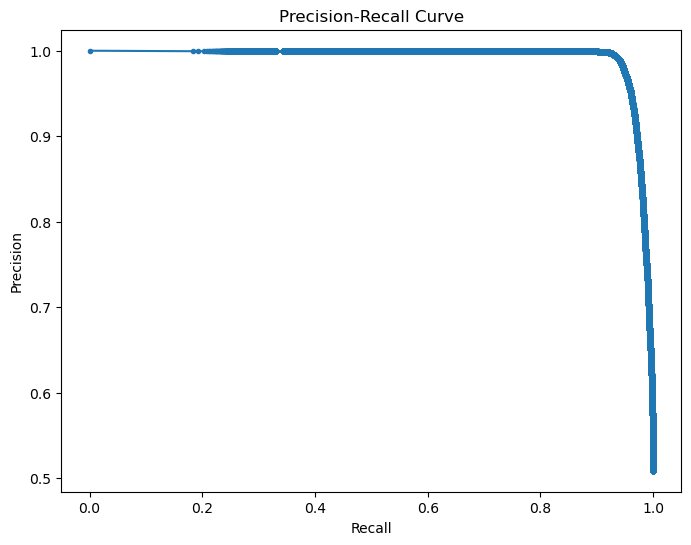

AUPRC: 0.9912918933719181


In [71]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)
auprc = average_precision_score(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

print("AUPRC:", auprc)

-----------------------------------------------------------------------------------------------------------------

# Perfect. Model 5 is the optimal model.

After resampling the data to fix the class imbalance, scaling the predictors, and fitting a logistic regression model with columns V17, V14, V12, V1, V7, and V10, I have chosen my optimal model and can now use it to detect future fraudulent transactions on credit cards.

### 6 predictors

Accuracy: ~ 96.45%

Precision: ~ 98.67%

Recall: ~ 94.19%

F1-score: ~ 96.38%

### And no Overfit